# Forecasting by Using Prophet

23:31:44 - cmdstanpy - INFO - Chain [1] start processing
23:31:45 - cmdstanpy - INFO - Chain [1] done processing


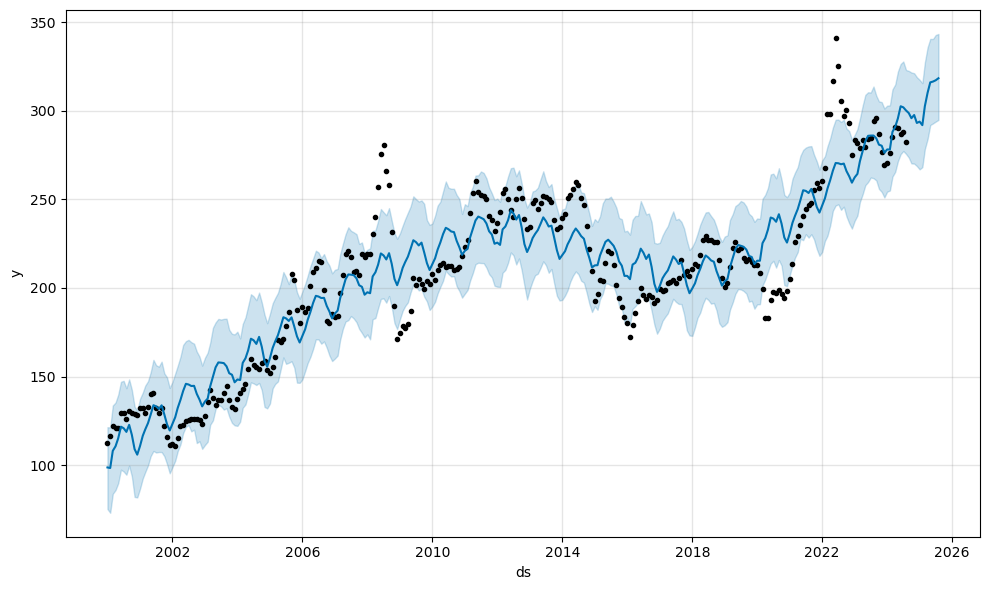

In [40]:
from prophet import Prophet
import pandas as pd

# Load data
df = pd.read_excel('sample_data.xlsx')
df.columns = ['ds', 'y']  # 'ds' for date, 'y' for value

# Create and fit the model
model = Prophet()
model.fit(df)

# Make future predictions
future = model.make_future_dataframe(periods=12, freq='M')  # Predict for 12 months into the future
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast);


22:53:05 - cmdstanpy - INFO - Chain [1] start processing
22:53:05 - cmdstanpy - INFO - Chain [1] done processing


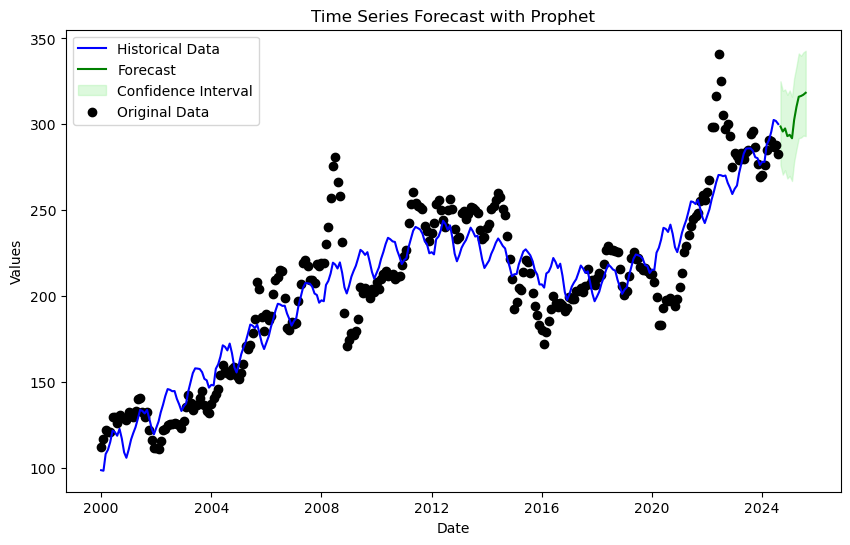

In [35]:
# For a better graph

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load data
df = pd.read_excel('sample_data.xlsx')
df.columns = ['ds', 'y']  # 'ds' for date, 'y' for value

# Create and fit the model
model = Prophet()
model.fit(df)

# Make future predictions
future = model.make_future_dataframe(periods=12, freq='M')  # Predict for 12 months into the future
forecast = model.predict(future)

# Separate actual data and forecast data
historical = forecast[forecast['ds'] <= df['ds'].max()]  # Up to the end of historical data
future_forecast = forecast[forecast['ds'] > df['ds'].max()]  # Future predictions

# Plot
plt.figure(figsize=(10, 6))

# Plot historical data
plt.plot(historical['ds'], historical['yhat'], label='Historical Data', color='blue')

# Plot future forecast with confidence interval
plt.plot(future_forecast['ds'], future_forecast['yhat'], label='Forecast', color='green')
plt.fill_between(future_forecast['ds'], future_forecast['yhat_lower'], future_forecast['yhat_upper'], 
                 color='lightgreen', alpha=0.3, label='Confidence Interval')

# Plot actual data points (original data)
plt.scatter(df['ds'], df['y'], color='black', label='Original Data')

# Customize the plot
plt.title('Time Series Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()


In [38]:
# Forecasting values for next 12 months
forecast[['ds','yhat']][-12:]

,ds,yhat
296,2024-08-31,298.752221
297,2024-09-30,295.843363
298,2024-10-31,297.626204
299,2024-11-30,293.147834
300,2024-12-31,293.897834
301,2025-01-31,291.908477
302,2025-02-28,302.573899
303,2025-03-31,310.197400
304,2025-04-30,316.055183
305,2025-05-31,316.518135
